In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Chapter 4<br>Least Squares

## 4.4 Generalized Minimum Residual (GMRES) Method

In [2]:
def conj_grad_method(A, b, initial_guess=0, iter_num=0):
    n = len(A)
    x = initial_guess * np.ones(n)
    r = b - A.dot(x)
    d = r
    
    if iter_num == 0:
        iter_num = n

    for _ in range(iter_num):
        alpha = r.dot(r) / d.dot(A).dot(d)
        x = x + alpha*d
        beta = np.dot(r - alpha*A.dot(d), r - alpha*A.dot(d)) / r.dot(r)
        r = r - alpha*A.dot(d)
        d = r + beta*d
        
        if r.max() == 0:
            break
    
    return x

In [3]:
def Preconditioned_CGM(A, b, precondition, initial_guess=0, iter_num=0):
    n = len(A)
    
    if precondition == "Jacobi":
        M = np.diag(A)
        M_inv = np.diag(1/M)
    
    elif precondition == "Gauss_Seidel":
        D = np.diag(A)
        M = (np.tril(A)/D).dot(np.triu(A))
        M_inv = np.linalg.inv(M)
    
    else:
        raise ValueError("Please give the right preconditioner!")
    
    x = initial_guess * np.ones(n)
    r = b - A.dot(x)
    d = r.dot(M_inv)
    z = d
    
    if iter_num == 0:
        iter_num = n
    
    for _ in range(iter_num):
        alpha = r.dot(z) / d.dot(A).dot(d)
        x = x + alpha*d
        beta = np.dot(r - alpha*A.dot(d), (r - alpha*A.dot(d)).dot(M_inv)) / r.dot(z)
        r = r - alpha*A.dot(d)
        z = r.dot(M_inv)
        d = z + beta*d
        
        if r.max() == 0:
            break    
    
    return x

### Q. 1

In [4]:
def A_ij(n):
    A = np.zeros((n, n))
    
    for i in range(n):
        A[i, i] = i+1
        try:
            A[i, i+1] = 0.5
            A[i+1, i] = 0.5
            A[i, i+2] = 0.5
            A[i+2, i] = 0.5
        except:
            pass
    
    return A

n = 1000
A = A_ij(n)

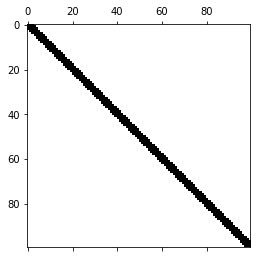

In [5]:
# (a)
# Just show the structure when n = 100.
plt.matshow(A_ij(100) != 0, cmap='binary')
plt.show()

In [6]:
# (b)
x_e = np.ones(n)
b = A.dot(x_e)
tol = 1e-10

error_matrix = np.zeros((3, 30))
error_matrix[:, 0] = 1

Conjugate Gradient Method without preconditioner

In [7]:
iter_n = 0
x = np.zeros(n)

while True:
    x = conj_grad_method(A, b, initial_guess=x, iter_num=1)
    error = abs(x - x_e).max()
    iter_n += 1
    
    if iter_n < 30:
        error_matrix[0, iter_n] = error
    
    if error < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 15032 / Backward error: 2.68328e-11


Jacobi preconditioner

In [8]:
iter_n = 0
x = np.zeros(n)

while True:
    x = Preconditioned_CGM(A, b, "Jacobi", initial_guess=x, iter_num=1)
    error = abs(x - x_e).max()
    iter_n += 1
    
    if iter_n < 30:
        error_matrix[1, iter_n] = error
    
    if error < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 30 / Backward error: 4.30411e-12


Gauss-Seidel preconditioner

In [9]:
iter_n = 0
x = np.zeros(n)

while True:
    x = Preconditioned_CGM(A, b, "Gauss_Seidel", initial_guess=x, iter_num=1)
    error = abs(x - x_e).max()
    iter_n += 1
        
    if iter_n < 30:
        error_matrix[2, iter_n] = error
    
    if error < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 10 / Backward error: 1.48701e-10


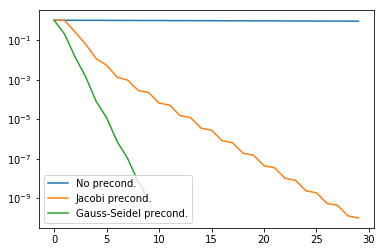

In [10]:
plt.plot(np.arange(30), error_matrix[0], label="No precond.")
plt.plot(np.arange(30), error_matrix[1], label="Jacobi precond.")
plt.plot(np.arange(10), error_matrix[2, :10], label="Gauss-Seidel precond.")
plt.yscale("log")
plt.legend()

plt.show()

### Q. 2

In [11]:
def A_ij(n):
    A = np.zeros((n, n))        
    
    for i in range(n):
        A[i, i] = i+1
        try:
            A[i, i+1] = 0.5
            A[i+1, i] = 0.5
            A[i, i+2] = 0.5
            A[i+2, i] = 0.5
            A[i, 2*i] = 0.5
            A[2*i, i] = 0.5
        except:
            pass

    return A

n = 1000
A = A_ij(n)

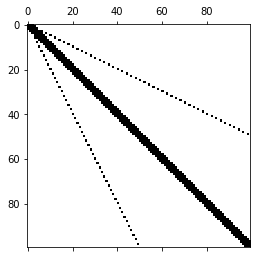

In [12]:
# (a)
# Just show the structure when n = 100.
plt.matshow(A_ij(100) != 0, cmap='binary')
plt.show()

In [13]:
# (b)
x_e = np.ones(n)
b = A.dot(x_e)
tol = 1e-10

error_matrix = np.zeros((3, 30))
error_matrix[:, 0] = 1

Conjugate Gradient Method without preconditioner

In [14]:
iter_n = 0
x = np.zeros(n)

while True:
    x = conj_grad_method(A, b, initial_guess=x, iter_num=1)
    error = abs(x - x_e).max()
    iter_n += 1
    
    if iter_n < 30:
        error_matrix[0, iter_n] = error
    
    if error < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 38183 / Backward error: 1.81899e-11


Jacobi preconditioner

In [15]:
iter_n = 0
x = np.zeros(n)

while True:
    x = Preconditioned_CGM(A, b, "Jacobi", initial_guess=x, iter_num=1)
    error = abs(x - x_e).max()
    iter_n += 1
    
    if iter_n < 30:
        error_matrix[1, iter_n] = error
    
    if error < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 50 / Backward error: 2.07212e-12


Gauss-Seidel preconditioner

In [16]:
iter_n = 0
x = np.zeros(n)

while True:
    x = Preconditioned_CGM(A, b, "Gauss_Seidel", initial_guess=x, iter_num=1)
    error = abs(x - x_e).max()
    iter_n += 1
        
    if iter_n < 30:
        error_matrix[2, iter_n] = error
    
    if error < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 16 / Backward error: 1.89857e-11


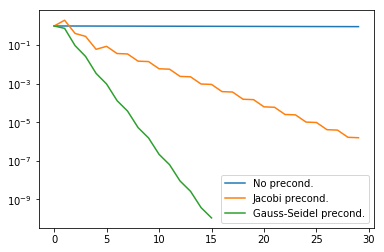

In [17]:
plt.plot(np.arange(30), error_matrix[0], label="No precond.")
plt.plot(np.arange(30), error_matrix[1], label="Jacobi precond.")
plt.plot(np.arange(16), error_matrix[2, :16], label="Gauss-Seidel precond.")
plt.yscale("log")
plt.legend()

plt.show()

### Q. 3

In [18]:
def A_ij(n):
    A = np.zeros((n, n))
    
    for i in range(n):
        A[i, i] = i+1
        try:
            A[i, i+2] = 0.5
            A[i+2, i] = 0.5
            A[i, i+4] = 0.5
            A[i+4, i] = 0.5
        except:
            pass

    for i in range(n-5):
        A[-1, i] = -0.1
        A[i, -1] = -0.1
    return A

n = 500
A = A_ij(n)

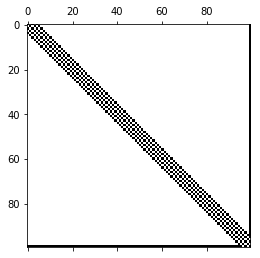

In [19]:
# (a)
# Just show the structure when n = 100.
plt.matshow(A_ij(100) != 0, cmap='binary')
plt.show()

In [20]:
# (b)
x_e = np.ones(n)
b = A.dot(x_e)
tol = 1e-10

error_matrix = np.zeros((3, 30))
error_matrix[:, 0] = 1

Conjugate Gradient Method without preconditioner

In [21]:
iter_n = 0
x = np.zeros(n)

while True:
    x = conj_grad_method(A, b, initial_guess=x, iter_num=1)
    error = abs(x - x_e).max()
    iter_n += 1
    
    if iter_n < 30:
        error_matrix[0, iter_n] = error
    
    if error < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 6676 / Backward error: 1.80949e-11


Jacobi preconditioner

In [22]:
iter_n = 0
x = np.zeros(n)

while True:
    x = Preconditioned_CGM(A, b, "Jacobi", initial_guess=x, iter_num=1)
    error = abs(x - x_e).max()
    iter_n += 1
    
    if iter_n < 30:
        error_matrix[1, iter_n] = error
    
    if error < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 23 / Backward error: 7.85807e-11


Gauss-Seidel preconditioner

In [23]:
iter_n = 0
x = np.zeros(n)

while True:
    x = Preconditioned_CGM(A, b, "Gauss_Seidel", initial_guess=x, iter_num=1)
    error = abs(x - x_e).max()
    iter_n += 1
        
    if iter_n < 30:
        error_matrix[2, iter_n] = error
    
    if error < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 9 / Backward error: 2.30614e-10


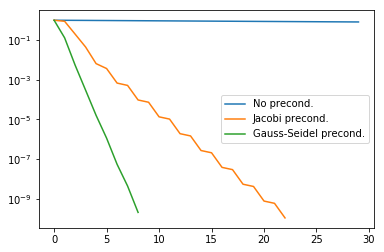

In [24]:
plt.plot(np.arange(30), error_matrix[0], label="No precond.")
plt.plot(np.arange(23), error_matrix[1, :23], label="Jacobi precond.")
plt.plot(np.arange(9), error_matrix[2, :9], label="Gauss-Seidel precond.")
plt.yscale("log")
plt.legend()

plt.show()

### Q. 4

In [25]:
def A_ij(n):
    A = np.zeros((n, n))
    
    for i in range(n):
        A[i, i] = (i+1)**(1/3)
        try:
            A[i, i+2] = 0.5
            A[i+2, i] = 0.5
            A[i, i+4] = 0.5
            A[i+4, i] = 0.5
        except:
            pass

    for i in range(n-5):
        A[-1, i] = -0.1
        A[i, -1] = -0.1
    return A

n = 500
A = A_ij(n)

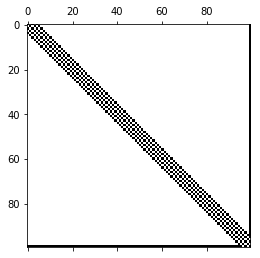

In [26]:
# (a)
# Just show the structure when n = 100.
plt.matshow(A_ij(100) != 0, cmap='binary')
plt.show()

In [27]:
# (b)
x_e = np.ones(n)
b = A.dot(x_e)
tol = 1e-10

error_matrix = np.zeros((3, 30))
error_matrix[:, 0] = 1

Conjugate Gradient Method without preconditioner

In [28]:
iter_n = 0
x = np.zeros(n)

while True:
    x = conj_grad_method(A, b, initial_guess=x, iter_num=1)
    error = abs(x - x_e).max()
    iter_n += 1
    
    if iter_n < 30:
        error_matrix[0, iter_n] = error
    
    if error < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 208 / Backward error: 4.99938e-11


Jacobi preconditioner

In [29]:
iter_n = 0
x = np.zeros(n)

while True:
    x = Preconditioned_CGM(A, b, "Jacobi", initial_guess=x, iter_num=1)
    error = abs(x - x_e).max()
    iter_n += 1
    
    if iter_n < 30:
        error_matrix[1, iter_n] = error
    
    if error < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 53 / Backward error: 5.01568e-11


Gauss-Seidel preconditioner

In [30]:
iter_n = 0
x = np.zeros(n)

while True:
    x = Preconditioned_CGM(A, b, "Gauss_Seidel", initial_guess=x, iter_num=1)
    error = abs(x - x_e).max()
    iter_n += 1
        
    if iter_n < 30:
        error_matrix[2, iter_n] = error
    
    if error < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 14 / Backward error: 3.85256e-11


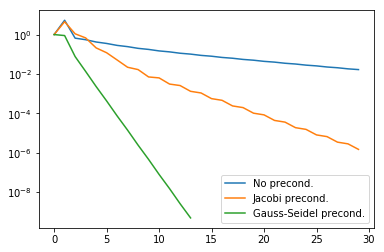

In [31]:
plt.plot(np.arange(30), error_matrix[0], label="No precond.")
plt.plot(np.arange(30), error_matrix[1], label="Jacobi precond.")
plt.plot(np.arange(14), error_matrix[2, :14], label="Gauss-Seidel precond.")
plt.yscale("log")
plt.legend()

plt.show()

### Q. 5

In [32]:
def A_ij(n):
    A = np.zeros((4*n, 4*n))
    C = np.zeros((n, n))
    
    for i in range(n):
        C[i, i] = 2
        try:
            C[i, i+3] = 0.1
            C[i+3, i] = 0.1
            C[i, i+39] = 0.5
            C[i+39, i] = 0.5
            C[i, i+42] = 0.5
            C[i+42, i] = 0.5
        except:
            pass
            
    for i in range(4):
        A[i*n:(i+1)*n, i*n:(i+1)*n] = C
        try:
            A[(i+1)*n:(i+2)*n, i*n:(i+1)*n] = C/2
            A[i*n:(i+1)*n, (i+1)*n:(i+2)*n] = C/2
        except:
            pass
        
    return A

n = 195
A = A_ij(n)

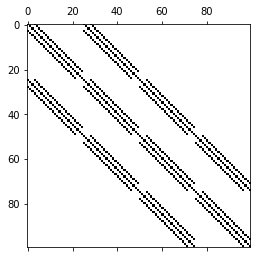

In [33]:
# (a)
# Just show the structure when n = 100.
plt.matshow(A_ij(25) != 0, cmap='binary')
plt.show()

In [34]:
# (b)
x_e = np.ones(4*n)
b = A.dot(x_e)
tol = 1e-10

error_matrix = np.zeros((3, 50))
error_matrix[:, 0] = 1

Conjugate Gradient Method without preconditioner

In [35]:
iter_n = 0
x = np.zeros(4*n)

while True:
    x = conj_grad_method(A, b, initial_guess=x, iter_num=1)
    error = abs(x - x_e).max()
    iter_n += 1
    
    if iter_n < 50:
        error_matrix[0, iter_n] = error
    
    if error < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 213 / Backward error: 4.6203e-11


Jacobi preconditioner

In [36]:
iter_n = 0
x = np.zeros(4*n)

while True:
    x = Preconditioned_CGM(A, b, "Jacobi", initial_guess=x, iter_num=1)
    error = abs(x - x_e).max()
    iter_n += 1
    
    if iter_n < 50:
        error_matrix[1, iter_n] = error
    
    if error < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 213 / Backward error: 4.6203e-11


Gauss-Seidel preconditioner

In [37]:
iter_n = 0
x = np.zeros(4*n)

while True:
    x = Preconditioned_CGM(A, b, "Gauss_Seidel", initial_guess=x, iter_num=1)
    error = abs(x - x_e).max()
    iter_n += 1
        
    if iter_n < 50:
        error_matrix[2, iter_n] = error
    
    if error < tol:
        break
        
backward_error = (A.dot(x) - b).max()
print("Iter: %d / Backward error: %g" % (iter_n, backward_error))

Iter: 69 / Backward error: 2.01279e-11


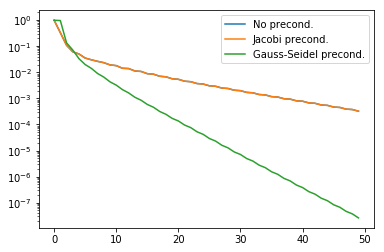

In [38]:
plt.plot(np.arange(50), error_matrix[0], label="No precond.")
plt.plot(np.arange(50), error_matrix[1], label="Jacobi precond.")
plt.plot(np.arange(50), error_matrix[2], label="Gauss-Seidel precond.")
plt.yscale("log")
plt.legend()

plt.show()